In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/admn/Downloads/Airlines/Airlines.csv")
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)

In [4]:
IndexedDataset = df.set_index(['Month'])

In [5]:
from datetime import datetime

In [6]:
IndexedDataset.tail(5)

,Airline_Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


C:\Users\admn\Anaconda2\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


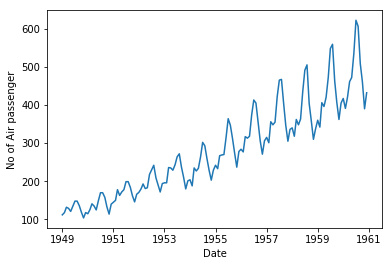

In [7]:
plt.xlabel("Date")
plt.ylabel("No of Air passenger")
plt.plot(IndexedDataset)

In [8]:
#Determining rolling statistics
rolmean = IndexedDataset.rolling(window=12).mean()

rolstd = IndexedDataset.rolling(window=12).std()

print(rolmean, rolstd)

(            Airline_Passengers
Month                         
1949-01-01                 NaN
1949-02-01                 NaN
1949-03-01                 NaN
1949-04-01                 NaN
1949-05-01                 NaN
1949-06-01                 NaN
1949-07-01                 NaN
1949-08-01                 NaN
1949-09-01                 NaN
1949-10-01                 NaN
1949-11-01                 NaN
1949-12-01          126.666667
1950-01-01          126.916667
1950-02-01          127.583333
1950-03-01          128.333333
1950-04-01          128.833333
1950-05-01          129.166667
1950-06-01          130.333333
1950-07-01          132.166667
1950-08-01          134.000000
1950-09-01          135.833333
1950-10-01          137.000000
1950-11-01          137.833333
1950-12-01          139.666667
1951-01-01          142.166667
1951-02-01          144.166667
1951-03-01          147.250000
1951-04-01          149.583333
1951-05-01          153.500000
1951-06-01          155.916667
...    

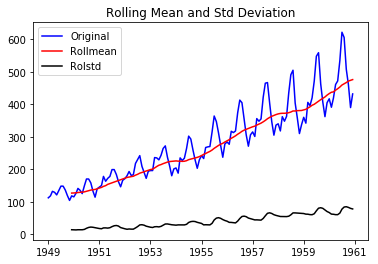

In [9]:
orig = plt.plot(IndexedDataset, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rollmean')
std = plt.plot(rolstd, color = 'black', label = 'Rolstd')
plt.legend(loc='best')
plt.title("Rolling Mean and Std Deviation")
plt.show()

In [10]:
#Perform Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

In [11]:
print("Results of Dickey-Fuller Test:")
dftest = adfuller(IndexedDataset['Airline_Passengers'], autolag='AIC')
dfop = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags used','No of observations used'])
for key,value in dftest[4].items():
    dfop['critical value (%s)'%key] = value
    
print(dfop)

Results of Dickey-Fuller Test:
Test Statistic               0.815369
p-value                      0.991880
#Lags used                  13.000000
No of observations used    130.000000
critical value (5%)         -2.884042
critical value (1%)         -3.481682
critical value (10%)        -2.578770
dtype: float64


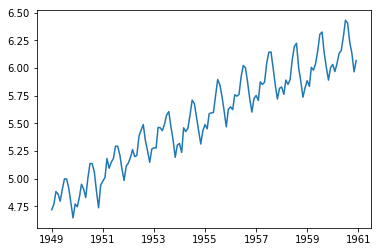

In [12]:
#Estimated Trend
IndexedDataset_logScale = np.log(IndexedDataset)
plt.plot(IndexedDataset_logScale)

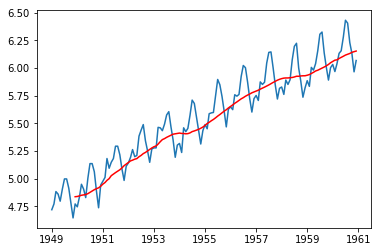

In [13]:
movingAverage = IndexedDataset_logScale.rolling(window=12).mean()
movingSTD = IndexedDataset_logScale.rolling(window=12).std()
plt.plot(IndexedDataset_logScale)
plt.plot(movingAverage, color = 'red')

In [14]:
datasetLogScaleMinusMovingAverage = IndexedDataset_logScale - movingAverage 
datasetLogScaleMinusMovingAverage.head(12)

#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Airline_Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    #Plot Rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'Red', label = 'Mean')
    std = plt.plot(movingSTD, color = 'Black', label = 'Std')
    plt.legend(loc = 'best')
    plt.title("Rolling Mean and STD deviation")
    plt.show(block=False)   
    
    
    #Dickey Fuller Test
    print("Results of Dickey Fuller test")
    dftest = adfuller(timeseries['Airline_Passengers'], autolag='AIC')
    dfop = pd.Series(dftest[0:4], index=['Test-statistics', 'pvalue', '#Lags used', 'No of observations'])
    for key,value in dftest[4].items():
        dfop['critical value (%s)'%key] = value
    print(dfop)

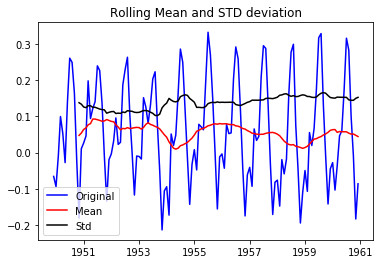

Results of Dickey Fuller test
Test-statistics          -3.162908
pvalue                    0.022235
#Lags used               13.000000
No of observations      119.000000
critical value (5%)      -2.886151
critical value (1%)      -3.486535
critical value (10%)     -2.579896
dtype: float64


In [16]:
test_stationarity(datasetLogScaleMinusMovingAverage)

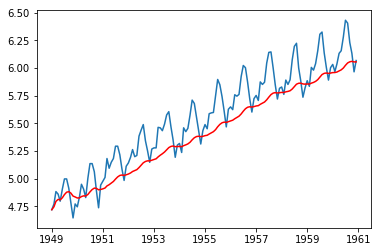

In [17]:
#Calculating Weighted Average
exponentialDecayWeightedAverage = IndexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(IndexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

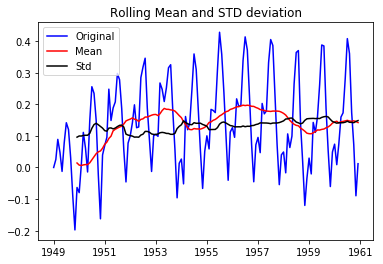

Results of Dickey Fuller test
Test-statistics          -3.601262
pvalue                    0.005737
#Lags used               13.000000
No of observations      130.000000
critical value (5%)      -2.884042
critical value (1%)      -3.481682
critical value (10%)     -2.578770
dtype: float64


In [18]:
#Moving Average with Weighted Average
datasetLogScaleMinusMovingexponentialDecayAverage = IndexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingexponentialDecayAverage)

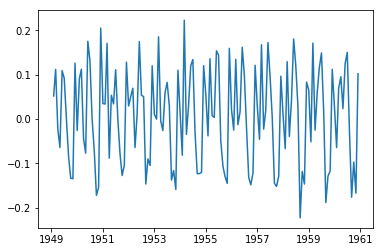

In [19]:
#Subtracting the mean from actual value
datasetlogDiffShifting = IndexedDataset_logScale - IndexedDataset_logScale.shift()
plt.plot(datasetlogDiffShifting)

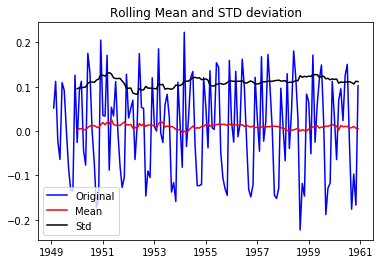

Results of Dickey Fuller test
Test-statistics          -2.717131
pvalue                    0.071121
#Lags used               14.000000
No of observations      128.000000
critical value (5%)      -2.884398
critical value (1%)      -3.482501
critical value (10%)     -2.578960
dtype: float64


In [20]:
datasetlogDiffShifting.dropna(inplace=True)
test_stationarity(datasetlogDiffShifting)

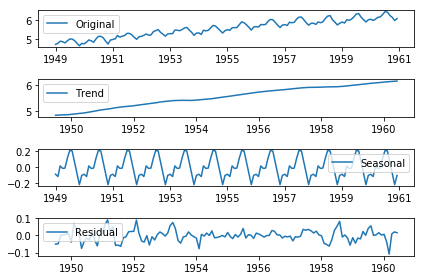

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IndexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(IndexedDataset_logScale, label='Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc = 'best')
plt.tight_layout()



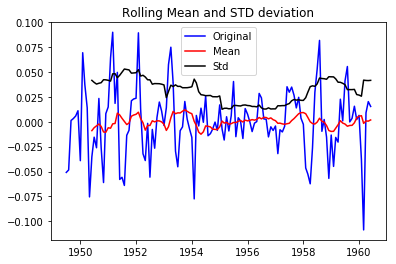

Results of Dickey Fuller test
Test-statistics        -6.332387e+00
pvalue                  2.885059e-08
#Lags used              9.000000e+00
No of observations      1.220000e+02
critical value (5%)    -2.885538e+00
critical value (1%)    -3.485122e+00
critical value (10%)   -2.579569e+00
dtype: float64


In [22]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


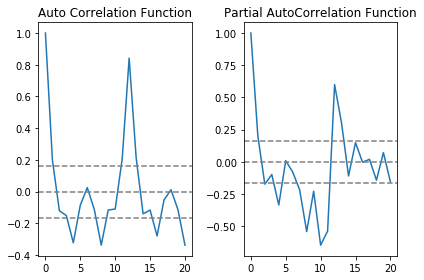

In [23]:
#ACF and PACF Plots
from statsmodels.tsa.stattools import acf,pacf

log_acf = acf(datasetlogDiffShifting, nlags=20)
log_pacf = pacf(datasetlogDiffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(log_acf)
plt.axhline(y = 0, linestyle='--', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(datasetlogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(datasetlogDiffShifting)), linestyle='--', color='gray')
plt.title('Auto Correlation Function')

plt.subplot(122)
plt.plot(log_pacf)
plt.axhline(y = 0, linestyle='--', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(datasetlogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(datasetlogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()



C:\Users\admn\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\admn\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\admn\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


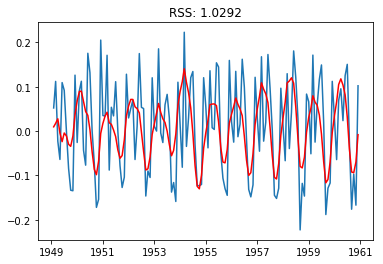

In [24]:
from statsmodels.tsa.arima_model import ARIMA

#AR Nodel
model = ARIMA(IndexedDataset_logScale, order = (2, 1, 2))
result_AR = model.fit(disp = 1)
plt.plot(datasetlogDiffShifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-datasetlogDiffShifting['Airline_Passengers'])**2))
print('Plotting AR Model')

C:\Users\admn\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\admn\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


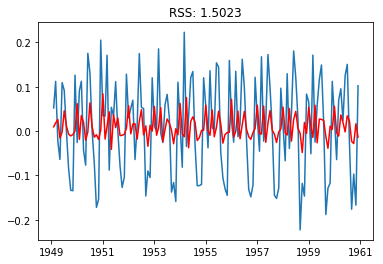

In [25]:
#MA Model

model = ARIMA(IndexedDataset_logScale, order = (2, 1, 0))
result_MA = model.fit(disp = 1)
plt.plot(datasetlogDiffShifting)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-datasetlogDiffShifting['Airline_Passengers'])**2))
print('Plotting MA Model')

In [26]:
prediction_ARIMA_diff = pd.Series(result_AR.fittedvalues, copy=True)
print(prediction_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [27]:
#Convert to CUMSUM
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [35]:
prediction_ARIMA_log = pd.Series(IndexedDataset_logScale['Airline_Passengers'].ix=[0], index=IndexedDataset_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value = 0)
prediction_ARIMA_log.head()

SyntaxError: keyword can't be an expression (<ipython-input-35-72ffeb05843b>, line 1)

In [37]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(IndexedDataset)
plt.plot(prediction_ARIMA)

NameError: name 'prediction_ARIMA_log' is not defined

In [38]:
IndexedDataset_logScale

,Airline_Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


C:\Users\admn\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


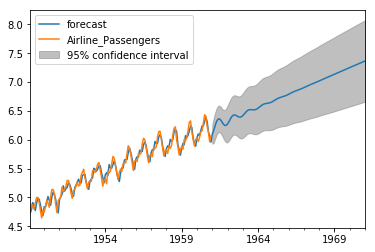

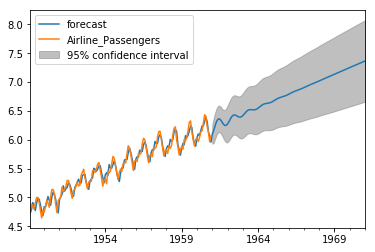

In [39]:
result_AR.plot_predict(1,264)

In [40]:
x = result_AR.forecast(steps=120)

In [41]:
x

(array([6.09553386, 6.15281387, 6.2244294 , 6.2924107 , 6.34164686,
        6.36359339, 6.35784676, 6.3313931 , 6.29597559, 6.2644774 ,
        6.24738352, 6.25025191, 6.27275844, 6.30940307, 6.35151479,
        6.38988637, 6.41727367, 6.4301105 , 6.42906699, 6.41842513,
        6.40456189, 6.39403655, 6.3918312 , 6.40019533, 6.41833712,
        6.44295419, 6.46937441, 6.49293991, 6.51024128, 6.51989052,
        6.52267608, 6.52112427, 6.51864573, 6.51853738, 6.52311969,
        6.53322402, 6.54812905, 6.56591587, 6.58410336, 6.60036568,
        6.61313299, 6.6219282 , 6.62737835, 6.63093182, 6.63438747,
        6.63938044, 6.64696563, 6.65739896, 6.67015376, 6.684143  ,
        6.69806674, 6.71077951, 6.72157785, 6.73034042, 6.73749874,
        6.74386447, 6.75037394, 6.75782665, 6.76668754, 6.77699893,
        6.78841388, 6.80032921, 6.81207262, 6.82308829, 6.83307209,
        6.84202569, 6.85022392, 6.85811304, 6.86617426, 6.87479237,
        6.88416389, 6.8942647 , 6.90487975, 6.91